# Evaluating Cell Type Transitions

This notebook loads the accuracies of the germ-layer and curated transitions evaluation to plot it

In [3]:
import numpy as np
import anndata
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
Path="/home/mgander/moscot-framework_reproducibility/data/mouse_temporal"
ts=['E3.5', 'E4.5', 'E5.25', 'E5.5', 'E6.25', 'E6.5', 'E6.75', 'E7.0', 'E7.25', 'E7.5', 'E7.75', 'E8.0', 'E8.25', 'E8.5a', 'E8.5b', 'E9.5', 'E10.5', 'E11.5', 'E12.5', 'E13.5']

# Evaluate cell type transitions

In [5]:
DF0=pd.read_pickle(f'{Path}/Validation_output/Cell_type_transiton_validation_pre_gastrulation.npy')
DF1=pd.read_pickle(f'{Path}/Validation_output/Cell_type_transiton_validation_gastrulation.npy')
DF2=pd.read_pickle(f'{Path}/Validation_output/Cell_type_transiton_validation_organogenesis.npy')

DF0['Stage']='Pre-Gastrulation\n (E3.5 to E6.5) '
DF1['Stage']='Gastrulation   \n(E6.5 to E8.5)  '
DF2['Stage']='Organogenesis \n(E8.5 to E13.5) '  

In [6]:
def get_weighted_accuracy(DF, method, validation):

    DF['Weighted_accuracy']=DF[f'{method}_{validation}_acc']*DF[f'{method}_{validation}_total_weight']
    accuracy=DF['Weighted_accuracy'].sum()/DF[f'{method}_{validation}_total_weight'].sum()
    return(accuracy)

In [7]:
def colaps_accuracy_dataframe(DF):
    mc=get_weighted_accuracy(DF, method='moscot', validation='curated')
    tc=get_weighted_accuracy(DF, method='tome', validation='curated')
    mg=get_weighted_accuracy(DF, method='moscot', validation='germ')
    tg=get_weighted_accuracy(DF, method='tome', validation='germ')
    
    df=pd.DataFrame({'Curated':[mc, tc], 'Germ':[mg, tg], 'Method':['moscot', 'TOME'], 
                     'Stage0': list(set(DF['Stage']))*2, 'Stage1': list(set(DF['Developmental_stage']))*2})
    return(df)

In [8]:
DF0n=colaps_accuracy_dataframe(DF0)
DF1n=colaps_accuracy_dataframe(DF1)
DF2n=colaps_accuracy_dataframe(DF2)

In [9]:
DF=pd.concat([DF0n, DF1n, DF2n], ignore_index=True)

In [10]:
import mplscience
mplscience.set_style(reset_current=True)

pal=sns.color_palette()
paln=pal.copy()
paln[0]=np.array([13,111,178])/255

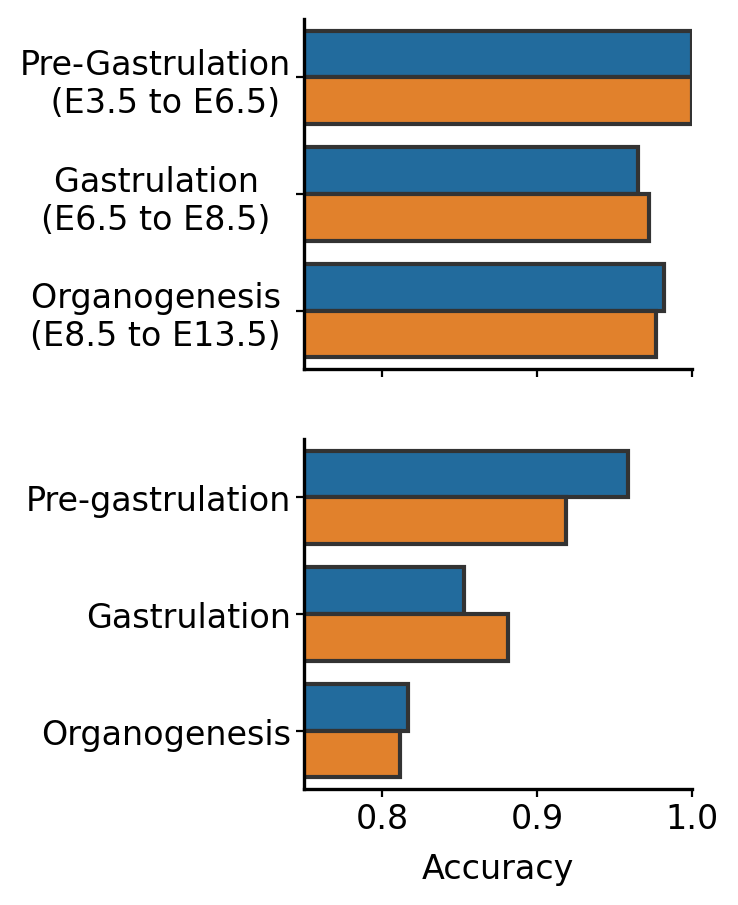

In [13]:
xlim=0.75

fig, axs = plt.subplots(2, 1, figsize=(2.5, 5), dpi=200)
# Germ layer transitions
g0=sns.barplot(ax=axs[0], data=DF, x='Germ', y="Stage0", hue='Method', palette=paln,
               linewidth=1.5, edgecolor='0.2')

g0.set(xticklabels=[])
g0.set(xlabel=None)
g0.set(ylabel=None)  

# Curated transitions

g1=sns.barplot(ax=axs[1], data=DF, x='Curated', y="Stage1", hue='Method', palette=paln,
               linewidth=1.5, edgecolor='0.2')
g1.set(ylabel=None)
plt.xlabel('Accuracy', fontsize=12)
axs[0].legend_.remove()
axs[1].legend_.remove()
axs[0].set_xlim(xlim, 1)
axs[1].set_xlim(xlim, 1)


plt.show()

In [12]:
DF

,Curated,Germ,Method,Stage0,Stage1
0,0.958983,1.000000,moscot,Pre-Gastrulation\n (E3.5 to E6.5),Pre-gastrulation
1,0.918878,1.000000,TOME,Pre-Gastrulation\n (E3.5 to E6.5),Pre-gastrulation
2,0.852884,0.965499,moscot,Gastrulation \n(E6.5 to E8.5),Gastrulation
3,0.881050,0.972596,TOME,Gastrulation \n(E6.5 to E8.5),Gastrulation
4,0.817093,0.981712,moscot,Organogenesis \n(E8.5 to E13.5),Organogenesis
5,0.811654,0.976929,TOME,Organogenesis \n(E8.5 to E13.5),Organogenesis
